**Sources**

https://towardsai.net/p/data-mining/text-mining-in-python-steps-and-examples-78b3f8fd913b
https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [ ]:
# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
nltk.download('punkt') # needed for tokenization
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') # needed for part of speech tagging
nltk.download('maxent_ne_chunker') # for named entity recognition
nltk.download('words') # for NER


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

**Word tokenizing**

In [ ]:
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America"

# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

**Sentence Tokenizing**

In [ ]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


**Frequencies**

In [ ]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'.': 1,
          'America': 1,
          'Brazil': 2,
          'In': 1,
          'South': 1,
          'a': 1,
          'coastline': 1,
          'drive': 1,
          'eastern': 1,
          'has': 1,
          'large': 1,
          'of': 2,
          'on': 2,
          'right-hand': 1,
          'road': 1,
          'side': 2,
          'the': 3,
          'they': 1})

In [ ]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('Brazil', 2),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

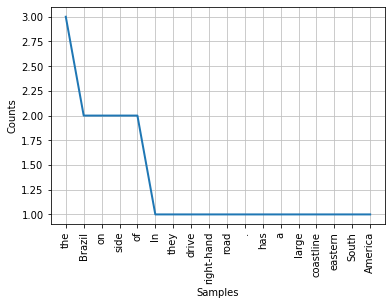

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

**Stemming**

In [ ]:
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("waiting")

'wait'

In [ ]:
# Checking for the list of words
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))

waited:wait
waiting:wait
waits:wait


In [ ]:
# Importing LancasterStemmer from nltk, more agressive than porter
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["giving", "given", "gave"]
for word in stm :
 print(word+ ":" +lst.stem(word))

giving:giv
given:giv
gave:gav


**Lemmatization**: In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [ ]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


**Stop Words**

In [ ]:
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
tokenized_sent = word_tokenize(text.lower())
print(tokenized_sent)
filtered_sent = [x for x in tokenized_sent if x not in stop_words]
print(filtered_sent)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [ ]:
# another way to do it
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
Filterd Sentence: ['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


**Part-of-speech tagging** is used to assign parts of speech to each word of a given text (such as nouns, verbs, pronouns, adverbs, conjunction, adjectives, interjection) based on its definition and its context. There are many tools available for POS taggers, and some of the widely used taggers are NLTK, Spacy, TextBlob, Standford CoreNLP, etc.


In [ ]:
text = "vote to choose a particular man or a group (party) to represent them in parliament"
#Tokenize the text
tex = word_tokenize(text)
for token in tex:
  print(nltk.pos_tag([token]))

[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


**Named entity recognition**
It is the process of detecting the named entities such as the person name, the location name, the company name, the quantities, and the monetary value.

In [ ]:
text = "Google's CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event"
#importing chunk library from nltk
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
token = word_tokenize(text)
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)
print(chunk)

(S
  (GPE Google/NNP)
  's/POS
  (ORGANIZATION CEO/NNP Sundar/NNP Pichai/NNP)
  introduced/VBD
  the/DT
  new/JJ
  Pixel/NNP
  at/IN
  (ORGANIZATION Minnesota/NNP Roi/NNP Centre/NNP)
  Event/NNP)


**Chunking**
Chunking means picking up individual pieces of information and grouping them into bigger pieces. In the context of NLP and text mining, chunking means a grouping of words or tokens into chunks.



In [ ]:
text = "We saw the yellow dog"
token = word_tokenize(text)
tags = nltk.pos_tag(token)
reg = "NP: {<DT>?<JJ>*<NN>}" 
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)

(S We/PRP saw/VBD (NP the/DT yellow/JJ dog/NN))
